# **Harris Corner Detector**

In this notebook  we will implement a Harris Corner Detecrtor from scratch 

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

%matplotlib inline

### Get Test Image

In [2]:
from skimage.data import brick

image = brick().astype(np.float32)

# (OPTIONAL) blurr image --> This will change hyperparameters
# image = cv2.blur(image, ksize=(5,5))

# 0-1 normalize
image /= image.max()

c:\Users\itber\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


Set Hyperparameters

In [3]:
k = 0.05
thresh = 0.5

Get Necessary Kernels

In [4]:
# Sobel kernels
Sx = np.array([
    [1, 0, -1],
    [2, 0, -2],
    [1, 0, -1]])

Sy = Sx.T

# Gaussian Kernel
G = np.array([
    [1, 2, 1],
    [2, 4, 2],
    [1, 2, 1]])/16

Function to compute Harris corner response

In [8]:
def corner_response(image, k=k):
    # compute first derivatives
    dx = cv2.filter2D(image, ddepth=-1, kernel=Sx)
    dy = cv2.filter2D(image, ddepth=-1, kernel=Sy)

    # Gaussian Filter
    A = cv2.filter2D(dx*dx, ddepth=-1, kernel=G)
    B = cv2.filter2D(dy*dy, ddepth=-1, kernel=G)
    C = cv2.filter2D(dx*dy, ddepth=-1, kernel=G)

    # compute corner response at all pixels
    return (A*B - (C*C)) - k*(A + B)*(A + B)


def get_harris_corners(image, k=k):

    # compute corner response
    R = corner_response(image, k)

    # find centroids
    ret, labels, stats, centroids = cv2.connectedComponentsWithStats(np.uint8(R > 1e-2))
    # define the criteria to stop and refine the corners
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.001)
    return cv2.cornerSubPix(image, np.float32(centroids), (9,9), (-1,-1), criteria)

In [9]:
corners = get_harris_corners(image)

# draw corners on output image
image_out = np.dstack((image, image, image))
for (x, y) in corners:
    x = np.round(x).astype(int)
    y = np.round(y).astype(int)
    cv2.circle(image_out, (x, y), radius=3, color=(0, 255, 0), thickness=-1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


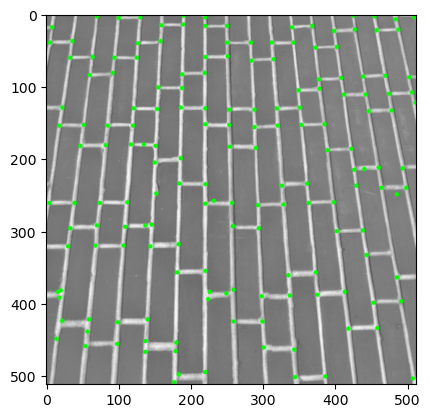

In [10]:
plt.imshow(image_out)